## EDA (Exploratory Data Analysis)

In [1]:
import os
import pandas as pd
import json
import re
from statistics import mean
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")

In [2]:
canonical_dev = os.listdir(os.path.join(os.path.abspath(os.getcwd()),"./liputan6_data/canonical/dev"))
canonical_test = os.listdir(os.path.join(os.path.abspath(os.getcwd()),"./liputan6_data/canonical/test"))
canonical_train = os.listdir(os.path.join(os.path.abspath(os.getcwd()),"./liputan6_data/canonical/train"))

In [ ]:
clean_article = []
clean_summary = []
extractive_summary = []
kunci_jawaban = []

In [ ]:
clean_article_list = []
label_important_or_not = []
panjang_token = []
panjang_sentence_text = []
panjang_sentence_summary = []

for fileJSON in canonical_train : 
    with open(os.path.join(os.path.abspath(os.getcwd()),"./liputan6_data/canonical/train",fileJSON),"r") as f : 
        file = json.load(f)
        panjang_sentence_text.append(len(file["clean_article"]))
        panjang_sentence_summary.append(len(file["clean_summary"]))
        for index,sentence in enumerate(file["clean_article"]) : 
            jadi = []
            for word in sentence : 
                jadi.append(word.lower())
            clean_article_list.append(jadi)
            panjang_token.append(len(jadi))
            if index not in file["extractive_summary"] : 
                label_important_or_not.append(0)
            else : 
                label_important_or_not.append(1)

In [11]:
with open("clean_article_train.pkl","wb") as f : 
    pickle.dump(clean_article_list,f)
with open("extractive_summary_train.pkl","wb") as f : 
    pickle.dump(label_important_or_not,f)
with open("panjang_token_train.pkl","wb") as f : 
    pickle.dump(panjang_token,f)
with open("panjang_sentence_summary_train.pkl","wb") as f : 
    pickle.dump(panjang_sentence_summary,f)
with open("panjang_sentence_article_train.pkl","wb") as f : 
    pickle.dump(panjang_sentence_text,f)

In [12]:
clean_article_list = []
label_important_or_not = []
panjang_token = []
panjang_sentence_text = []
panjang_sentence_summary = []

for fileJSON in canonical_test : 
    with open(os.path.join(os.path.abspath(os.getcwd()),"./liputan6_data/canonical/test",fileJSON),"r") as f : 
        file = json.load(f)
        panjang_sentence_text.append(len(file["clean_article"]))
        panjang_sentence_summary.append(len(file["clean_summary"]))
        for index,sentence in enumerate(file["clean_article"]) : 
            jadi = []
            for word in sentence : 
                jadi.append(word.lower())
            clean_article_list.append(jadi)
            panjang_token.append(len(jadi))
            if index not in file["extractive_summary"] : 
                label_important_or_not.append(0)
            else : 
                label_important_or_not.append(1)

In [13]:
with open("clean_article_test.pkl","wb") as f : 
    pickle.dump(clean_article_list,f)
with open("extractive_summary_test.pkl","wb") as f : 
    pickle.dump(label_important_or_not,f)
with open("panjang_token_test.pkl","wb") as f : 
    pickle.dump(panjang_token,f)
with open("panjang_sentence_summary_test.pkl","wb") as f : 
    pickle.dump(panjang_sentence_summary,f)
with open("panjang_sentence_article_test.pkl","wb") as f : 
    pickle.dump(panjang_sentence_text,f)

In [3]:
with open("DATA_FOR_CANONICAL/clean_article_test.pkl","rb") as f : 
    article_test = pickle.load(f)
with open("DATA_FOR_CANONICAL/extractive_summary_test.pkl","rb") as f : 
    labels_test = pickle.load(f)
with open("DATA_FOR_CANONICAL/panjang_token_test.pkl","rb") as f : 
    token_n_test = pickle.load(f)
with open("DATA_FOR_CANONICAL/panjang_sentence_summary_test.pkl","rb") as f : 
    sum_length_test = pickle.load(f)
with open("DATA_FOR_CANONICAL/panjang_sentence_article_test.pkl","rb") as f : 
    art_length_test = pickle.load(f)

with open("DATA_FOR_CANONICAL/clean_article_train.pkl","rb") as f : 
    article_train = pickle.load(f)
with open("DATA_FOR_CANONICAL/extractive_summary_train.pkl","rb") as f : 
    labels_train = pickle.load(f)
with open("DATA_FOR_CANONICAL/panjang_token_train.pkl","rb") as f : 
    token_n_train = pickle.load(f)
with open("DATA_FOR_CANONICAL/panjang_sentence_summary_train.pkl","rb") as f : 
    sum_length_train = pickle.load(f)
with open("DATA_FOR_CANONICAL/panjang_sentence_article_train.pkl","rb") as f : 
    art_length_train = pickle.load(f)

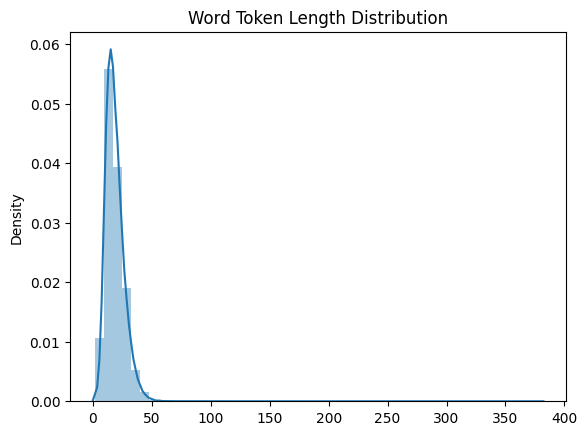

In [4]:
sns.distplot(token_n_test)
plt.title("Word Token Length Distribution")
plt.show()

(array([1.26556e+05, 1.89600e+03, 4.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2. ,  39.8,  77.6, 115.4, 153.2, 191. , 228.8, 266.6, 304.4,
        342.2, 380. ]),
 <BarContainer object of 10 artists>)

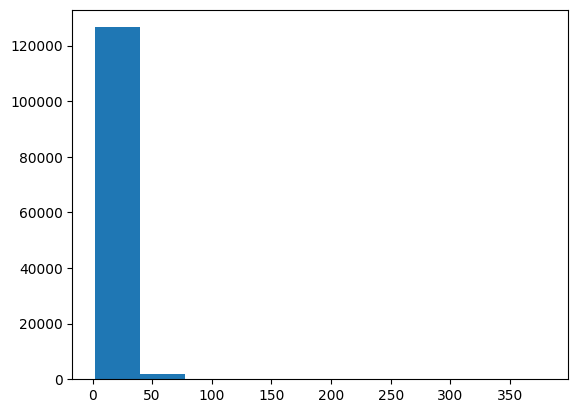

In [36]:
plt.hist(token_n_test)

In [5]:
counting = 0
for token in token_n_test :
    if token > 50 : 
        counting+=1
print(f"There are : {counting} points that have greater than 50 point, which is : {round(counting/len(token_n_test*100),10)}%")

print(f"The most frequent tokens are : {int(mode(token_n_test)[0])} tokens")
print(f"The most big tokens is : {np.max(token_n_test)}")

There are : 203 points that have greater than 50 point, which is : 1.58028e-05%
The most frequent tokens are : 15 tokens
The most big tokens is : 380


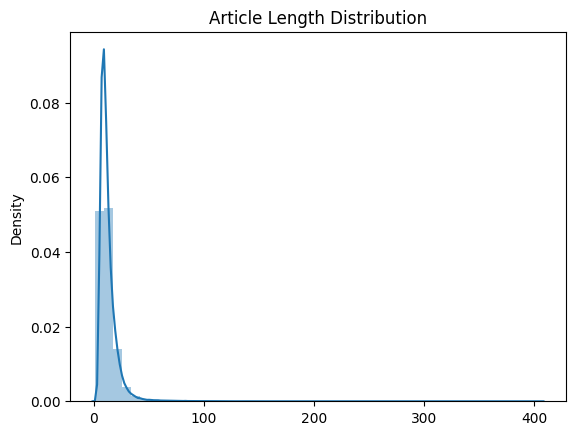

In [6]:
sns.distplot(art_length_train)
plt.title("Article Length Distribution")
plt.show()

In [7]:
print(f"The most frequent sentences length are : {int(mode(art_length_train)[0])} sentences")
print(f"The most long sentences is : {np.max(art_length_train)} sentences at {canonical_train[np.argmax(art_length_train)]}")

The most frequent sentences length are : 8 sentences
The most long sentences is : 406 sentences at 251484.json


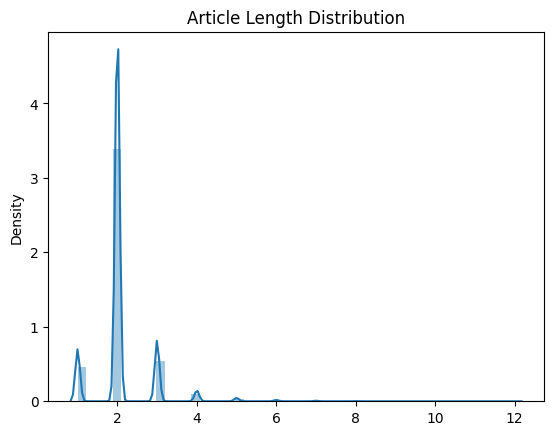

In [8]:
sns.distplot(sum_length_train)
plt.title("Article Length Distribution")
plt.show()

In [ ]:
dataDict = dict()
for i in sum_length_train : 
    if i not in dataDict.keys() : 
        dataDict[i] = 1
    else : 
        dataDict[i]+=1
key_l = []
val_l = []
for key in range(1,13): 
    key_l.append(key)
    val_l.append(dataDict[key])

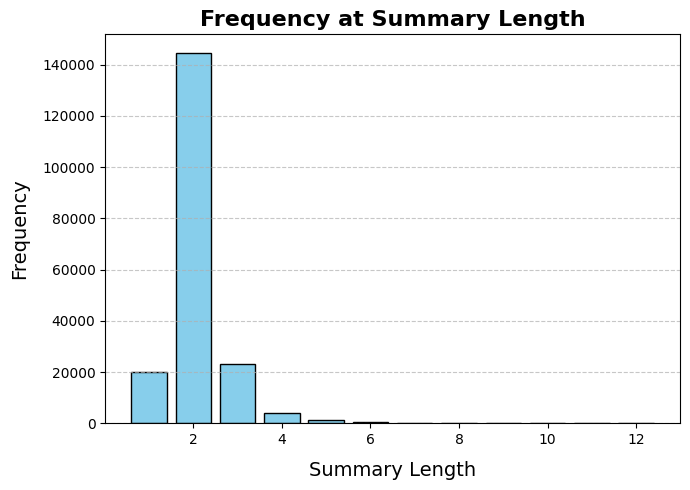

In [34]:
plt.figure(figsize=(7, 5)) 
plt.bar(key_l, val_l, color='skyblue', edgecolor='black') 

plt.title('Frequency at Summary Length', fontsize=16, fontweight='bold')
plt.xlabel('Summary Length', fontsize=14, labelpad=10) 
plt.ylabel('Frequency', fontsize=14, labelpad=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

In [9]:
print(f"The most frequent summary length are : {int(mode(sum_length_train)[0])} sentences")
print(f"The most long summary is : {np.max(sum_length_train)} sentences at {canonical_train[np.argmax(sum_length_train)]}")

The most frequent summary length are : 2 sentences
The most long summary is : 12 sentences at 220426.json


In [10]:
# So, from this EDA we can know that we can use padding and truncation with 100 for our max_length tokenizer.
# The important things from extractive summary is : predicting whether each sentence is important ot not which is 1 or 0, so n_labels = 2 (binary class)

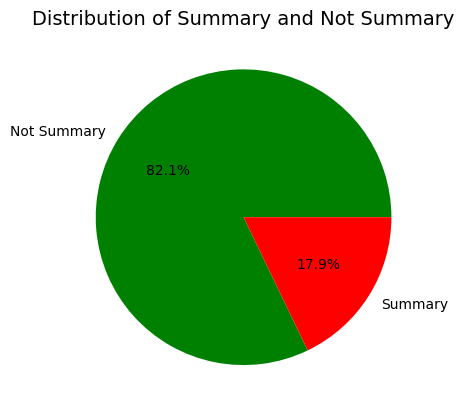

In [11]:
plt.pie([labels_train.count(0),labels_train.count(1)], labels = ["Not Summary","Summary"], autopct = "%.1f%%", colors = ["green","red"])
plt.title("Distribution of Summary and Not Summary",fontsize = 14)
plt.show()

In [ ]:
index_summary_dict = dict()
for fileJSON in canonical_train : 
    with open(os.path.join(os.path.abspath(os.getcwd()),"./liputan6_data/canonical/train",fileJSON),"r") as f : 
        file = json.load(f)
    for index_summary in file["extractive_summary"] : 
        if index_summary in index_summary_dict.keys() : 
            index_summary_dict[index_summary]+=1
        else : 
            index_summary_dict[index_summary] = 0   


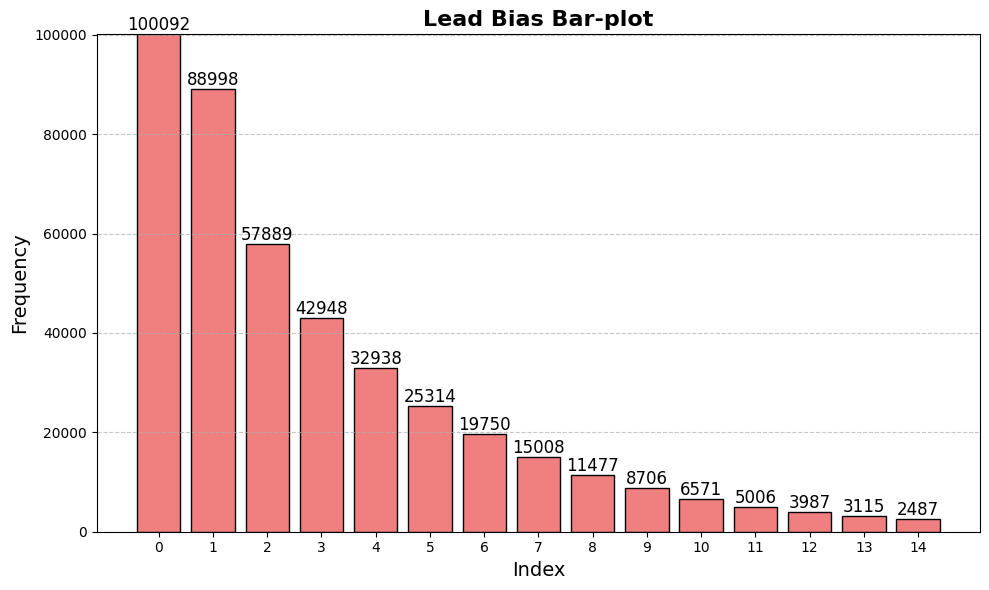

In [ ]:
keys_sum = sorted(list(index_summary_dict.keys()))

value_sum = []
for i in keys_sum : 
    value_sum.append(index_summary_dict[i])

keys_sum = keys_sum[:15]
value_sum = value_sum[:15]

plt.figure(figsize=(10, 6))
bars = plt.bar(keys_sum, value_sum, color='lightcoral', edgecolor='black') 

plt.title('Lead Bias Bar-plot', fontsize=16, fontweight='bold')
plt.xlabel('Index', fontsize=14) 
plt.ylabel('Frequency', fontsize=14)  

plt.grid(axis='y', linestyle='--', alpha=0.7) 

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.xticks(keys_sum)
plt.ylim(0, max(value_sum) + 5)
plt.tight_layout()
plt.show()